Sepsis is a serious condition that happens when the body’s immune system has an extreme response to an infection. The body’s reaction causes damage to its own tissues and organs.
In this project we will predict the onset of sepsis varying on different factors.

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=9b2b94386d79e1e48732cd85cfaff1aad9423845ae71de1face421db5aae0fc5
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [ ]:
from scipy.stats import chi2_contingency
import ppscore

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
import pickle

In [ ]:
import random
import warnings

warnings.filterwarnings("ignore")

# **Load The Dataset**

In [ ]:
df = pd.read_csv("/content/sepsis.csv")
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


**Feature Desciption:**
ID: A unique identifier for each patient.

PRG: Number of pregnancies (applicable only to females).

PL: Plasma glucose concentration.

PR: Diastolic blood pressure.

SK: Triceps skinfold thickness.

TS: 2-hour serum insulin.

M11: Body mass index (BMI).

BD2: Diabetes pedigree function.

Age: Age of the patient.

Insurance: Whether the patient has insurance coverage (1 for Yes, 0 for No).

Sepsis: The target variable indicating the presence or absence of sepsis (Positive for presence, Negative for absence).

In [ ]:
df_train = df.iloc[0: -1]
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


# **Exploratory Data Analysis**


In [ ]:
df_test = df.drop('Sepssis', axis=1)
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         598 non-null    object 
 1   PRG        598 non-null    int64  
 2   PL         598 non-null    int64  
 3   PR         598 non-null    int64  
 4   SK         598 non-null    int64  
 5   TS         598 non-null    int64  
 6   M11        598 non-null    float64
 7   BD2        598 non-null    float64
 8   Age        598 non-null    int64  
 9   Insurance  598 non-null    int64  
 10  Sepssis    598 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.5+ KB


In [ ]:
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,598.000000,598.000000,598.00000,598.00000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,3.829431,120.065217,68.72408,20.59699,79.593645,31.911873,0.481844,33.282609,0.685619
std,3.363665,32.638019,19.35066,16.00889,116.628361,8.012439,0.337451,11.836777,0.464658
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.00000,0.00000,0.000000,27.100000,0.248250,24.000000,0.000000
50%,3.000000,116.000000,70.00000,23.00000,36.500000,32.000000,0.384000,29.000000,1.000000
75%,6.000000,140.000000,80.00000,32.00000,124.250000,36.500000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.00000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_train.shape

(598, 11)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


In [ ]:
df_test.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_test.shape

(599, 10)

In [ ]:
df_train.sum().isnull()#checking missing values

ID           False
PRG          False
PL           False
PR           False
SK           False
TS           False
M11          False
BD2          False
Age          False
Insurance    False
Sepssis      False
dtype: bool

In [ ]:
df_test.sum().isnull()#checking missing values

ID           False
PRG          False
PL           False
PR           False
SK           False
TS           False
M11          False
BD2          False
Age          False
Insurance    False
dtype: bool

In [ ]:
#checking duplicates in dataset
train_duplicates = df_train[df_train.duplicated()]
test_duplicates = df_test[df_test.duplicated()]

if train_duplicates.empty == 1:
    print("No Duplicate Rows in Train Dataset")
else:
    print("No Duplicate Rows in Train Dataset")
    print(train_duplicates)

if test_duplicates.empty == 1:
    print("No Duplicate Rows in Test Dataset")
else:
    print("\nDuplicate Rows in Test Dataset:")
    print(test_duplicates)


No Duplicate Rows in Train Dataset
No Duplicate Rows in Test Dataset


# **Feature Engineering**
There are some columns with zero values, such as BMI, BD2, SK and PL. We will take the mean value for each agr group and substitue that in the zero values according to age.

In [ ]:
#adding age group
age_intervals = [20, 40, 60, 80, 90]
age_labels = ['20-39', '40-59', '60-79', '80-90']

In [ ]:
df_test['Age Group'] = pd.cut(df_test['Age'], bins=age_intervals, labels=age_labels)
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Age Group
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,40-59
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,20-39
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,20-39
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,20-39
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,20-39


In [ ]:
change_columns = ['PL', 'PR', 'SK', 'M11']
for column in change_columns:
    zero_rows_train = df_train[df_train[column] == 0]
    zero_rows_test = df_test[df_test[column] == 0]

for age_group in age_labels:
        age_group_mean_test = df_test[df_test['Age Group'] == age_group][column].mean()
        df_test.loc[(df_test['Age Group'] == age_group) & (df_test[column] == 0), column] = age_group_mean_test


In [ ]:
df_test.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,32.398889,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,6.969327,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Categorizing BMI:**

In [ ]:
def bmi_categories(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_train['BMICategory'] = df_train['M11'].apply(bmi_categories)
df_test['BMICategory'] = df_test['M11'].apply(bmi_categories)

**Categorizing Plasma Glucose**

In [ ]:
def glucose_categories(pl):
    if pl < 100:
        return 'Healthy'
    elif 100 <= pl < 126:
        return 'Prediabetic'
    else:
        return 'Diabetic'

df_train['GlucoseCategory'] = df_train['PL'].apply(glucose_categories)
df_test['GlucoseCategory'] = df_test['PL'].apply(glucose_categories)

**Categorizing Blood Pressure**

In [ ]:
def pr_categories(pr):
    if pr < 80:
        return 'Healthy'
    elif 80 <= pr < 90:
        return 'Pre-hypertension'
    elif 90 <= pr < 100:
        return 'Stage 1 Hypertension'
    else:
        return 'Stage 2 Hypertension'

df_train['PRCategory'] = df_train['PR'].apply(pr_categories)
df_test['PRCategory'] = df_test['PR'].apply(pr_categories)

**Age and Glucose Interaction Feature Engineering**

In [ ]:
df_train['Age_PL_Interact'] = df_train['Age'] * df_train['PL']
df_test['Age_PL_Interact'] = df_test['Age'] * df_test['PL']

In [ ]:
df_train.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,BMICategory,GlucoseCategory,PRCategory,Age_PL_Interact
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,Obese,Diabetic,Healthy,7400
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,Overweight,Healthy,Healthy,2635
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,Healthy,Diabetic,Healthy,5856
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,Overweight,Healthy,Healthy,1869
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,Obese,Diabetic,Healthy,4521


In [ ]:
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Age Group,BMICategory,GlucoseCategory,PRCategory,Age_PL_Interact
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,40-59,Obese,Diabetic,Healthy,7400
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,20-39,Overweight,Healthy,Healthy,2635
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,20-39,Healthy,Diabetic,Healthy,5856
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,20-39,Overweight,Healthy,Healthy,1869
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,20-39,Obese,Diabetic,Healthy,4521


In [ ]:
#drop extra columns
df_train.drop(['ID',  'Insurance', 'BMICategory', 'GlucoseCategory', 'PRCategory', 'Age_PL_Interact' ], axis=1, inplace=True)
df_test.drop(['ID', 'Age Group', 'Insurance', 'BMICategory', 'GlucoseCategory', 'PRCategory', 'Age_PL_Interact' ], axis=1, inplace=True)

**Encoding Categorical Variables**

In [ ]:
le = LabelEncoder()
df_train['Sepssis'] = le.fit_transform(df_train['Sepssis'])

In [ ]:
df_train.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_test.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# **Model Buliding**

Splitting into X and y

In [ ]:
X = df_train.drop('Sepssis', axis=1)
y = df_train['Sepssis']

Splitting into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_test, y_test):", X_test.shape, y_test.shape)

Shape of the Training Set (X_train, y_train): (478, 8) (478,)
Shape of the Evaluation Set (X_test, y_test): (120, 8) (120,)


In [ ]:
#checking class districution of dataset
print("Class distribution before balancing:")
print(y_train.value_counts())

Class distribution before balancing:
0    313
1    165
Name: Sepssis, dtype: int64


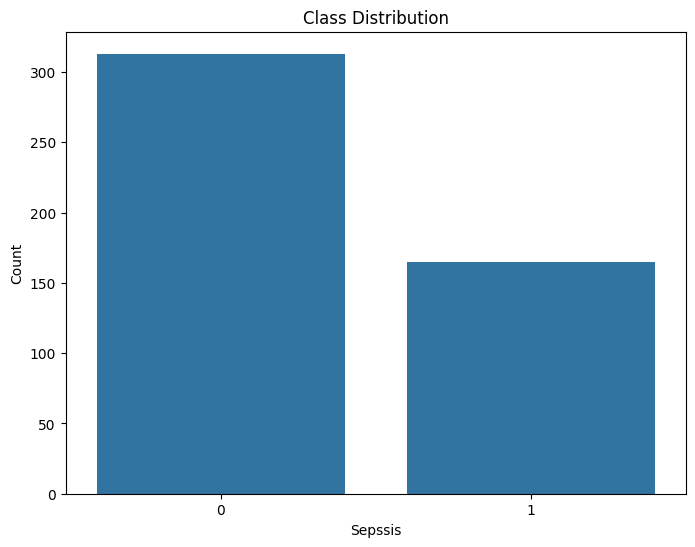

In [ ]:
class_counts = y_train.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
#balancing the dataset by oversampling
over_sample = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = over_sample.fit_resample(X_train, y_train)
balanced_class_counts = y_train_balanced.value_counts()
print("\nClass distribution in the balanced training set:")
print(balanced_class_counts)


Class distribution in the balanced training set:
0    313
1    313
Name: Sepssis, dtype: int64


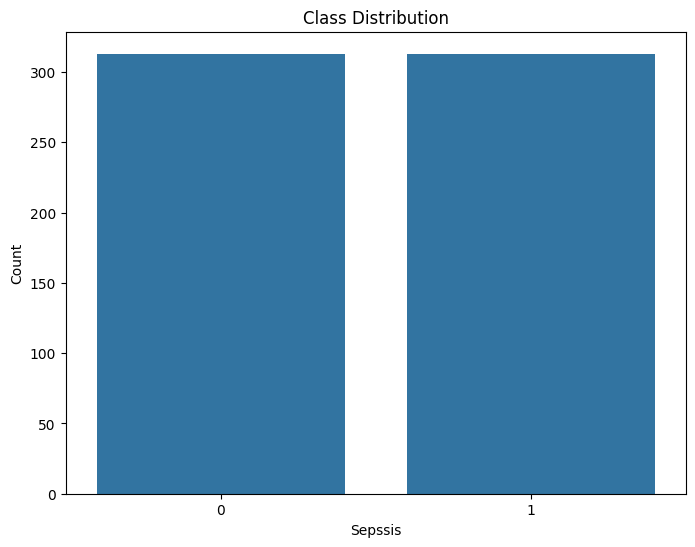

In [ ]:
class_counts = y_train_balanced.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


**Scaling**

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
y_train_balanced_df = pd.DataFrame(y_train_balanced, columns=['Sepssis'])

In [ ]:
print("Shape of X_train_scaled_df:", X_train_scaled_df.shape)
print("Shape of X_test_scaled_df:", X_test_scaled_df.shape)
print("Shape of y_train_balanced_df:", y_train_balanced_df.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_scaled_df: (626, 8)
Shape of X_test_scaled_df: (120, 8)
Shape of y_train_balanced_df: (626, 1)
Shape of y_test: (120,)


In [ ]:
X_train_scaled_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,0.411765,0.515152,0.606557,0.404040,0.141129,0.626263,0.051370,0.400000
1,0.588235,0.631313,0.573770,0.262626,0.154570,0.523569,0.051798,0.333333
2,0.117647,0.409091,0.590164,0.151515,0.102151,0.506734,0.198202,0.066667
3,0.176471,0.909091,0.524590,0.252525,0.094086,0.572391,0.080051,0.083333
4,0.647059,0.560606,0.688525,0.404040,0.000000,0.787879,0.360017,0.400000


In [ ]:
X_test_scaled_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,0.176471,0.444444,0.475410,0.111111,0.072581,0.417508,0.078339,0.016667
1,0.529412,0.787879,0.704918,0.282828,0.208333,0.577441,0.473031,0.350000
2,0.000000,0.510101,0.508197,0.000000,0.000000,0.368687,0.107877,0.066667
3,0.117647,0.737374,0.622951,0.353535,0.260753,0.643098,0.104880,0.133333
4,0.000000,0.575758,0.655738,0.343434,0.383065,0.744108,0.035531,0.100000


# **Model Evaluation**

In [ ]:
Results = {'Model':[], 'Acurracy':[], 'Precision':[], 'Recall':[], 'F1':[]}
Results = pd.DataFrame(Results)#to store results in this new dataframe
Results.head()

,Model,Acurracy,Precision,Recall,F1


In [ ]:
#initializing models
log_reg = LogisticRegression()
rand_forest = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
nb = GaussianNB()
svm = SVC()

In [ ]:
models = ['Logistic Regression', 'Random Forest Classifier', 'K-Nearest Neighbors', 'Decision Tree',
          'Gradient Boosting Classifier', 'Gaussian Naive Bayes', 'Support Vector Machine']


In [ ]:
Results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

**Confusion Matrix**

In [ ]:
for name, model in zip(models, [log_reg, rand_forest, knn, decision_tree, gb, nb, svm]):
    model.fit(X_train_scaled_df, y_train_balanced_df)
    y_pred = model.predict(X_test_scaled_df)

    print('\nModel:', name)
    print('-----------------------')
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))



Model: Logistic Regression
-----------------------

Confusion Matrix:
[[57 21]
 [10 32]]

Model: Random Forest Classifier
-----------------------

Confusion Matrix:
[[59 19]
 [16 26]]

Model: K-Nearest Neighbors
-----------------------

Confusion Matrix:
[[48 30]
 [11 31]]

Model: Decision Tree
-----------------------

Confusion Matrix:
[[63 15]
 [23 19]]

Model: Gradient Boosting Classifier
-----------------------

Confusion Matrix:
[[61 17]
 [14 28]]

Model: Gaussian Naive Bayes
-----------------------

Confusion Matrix:
[[55 23]
 [16 26]]

Model: Support Vector Machine
-----------------------

Confusion Matrix:
[[57 21]
 [13 29]]


**Classification Report**

In [ ]:
for name, model in zip(models, [log_reg, rand_forest, knn, decision_tree, gb, nb, svm]):
    model.fit(X_train_scaled_df, y_train_balanced_df)
    y_pred = model.predict(X_test_scaled_df)

    print('\nModel:', name)
    print('-----------------------')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
-----------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        78
           1       0.60      0.76      0.67        42

    accuracy                           0.74       120
   macro avg       0.73      0.75      0.73       120
weighted avg       0.76      0.74      0.75       120


Model: Random Forest Classifier
-----------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        78
           1       0.57      0.60      0.58        42

    accuracy                           0.70       120
   macro avg       0.67      0.68      0.67       120
weighted avg       0.70      0.70      0.70       120


Model: K-Nearest Neighbors
-----------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.62      0.70        78
    

**Evaluation Metrics**

In [ ]:
for name, model in zip(models, [log_reg, rand_forest, knn, decision_tree, gb, nb, svm]):
    model.fit(X_train_scaled_df, y_train_balanced_df)
    y_pred = model.predict(X_test_scaled_df)

    print('\nModel:', name)
    print('-----------------------')

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print('Accuracy:', round(accuracy, 2))
    print('Precision:', round(precision, 2))
    print('Recall:', round(recall, 2))
    print('F1:', round(f1, 2))


Model: Logistic Regression
-----------------------
Accuracy: 0.74
Precision: 0.6
Recall: 0.76
F1: 0.67

Model: Random Forest Classifier
-----------------------
Accuracy: 0.72
Precision: 0.6
Recall: 0.6
F1: 0.6

Model: K-Nearest Neighbors
-----------------------
Accuracy: 0.66
Precision: 0.51
Recall: 0.74
F1: 0.6

Model: Decision Tree
-----------------------
Accuracy: 0.69
Precision: 0.57
Recall: 0.48
F1: 0.52

Model: Gradient Boosting Classifier
-----------------------
Accuracy: 0.74
Precision: 0.62
Recall: 0.67
F1: 0.64

Model: Gaussian Naive Bayes
-----------------------
Accuracy: 0.68
Precision: 0.53
Recall: 0.62
F1: 0.57

Model: Support Vector Machine
-----------------------
Accuracy: 0.72
Precision: 0.58
Recall: 0.69
F1: 0.63


**Confusion Matrix**


Model: Logistic Regression
-----------------------


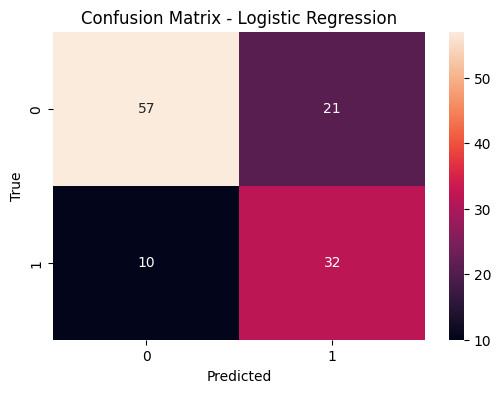


Model: Random Forest Classifier
-----------------------


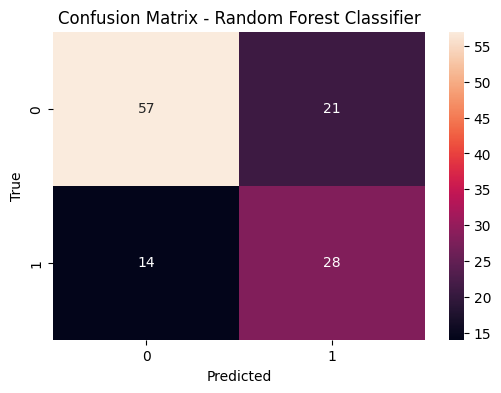


Model: K-Nearest Neighbors
-----------------------


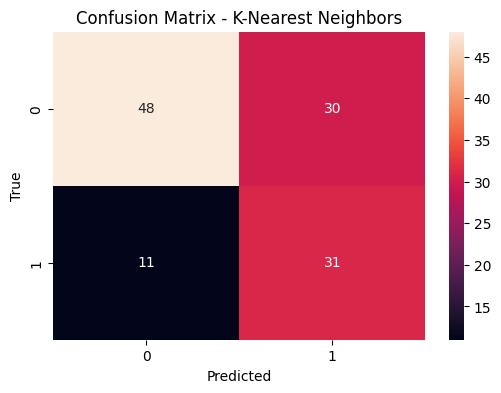


Model: Decision Tree
-----------------------


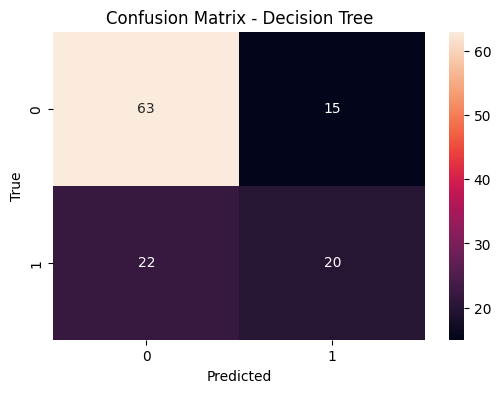


Model: Gradient Boosting Classifier
-----------------------


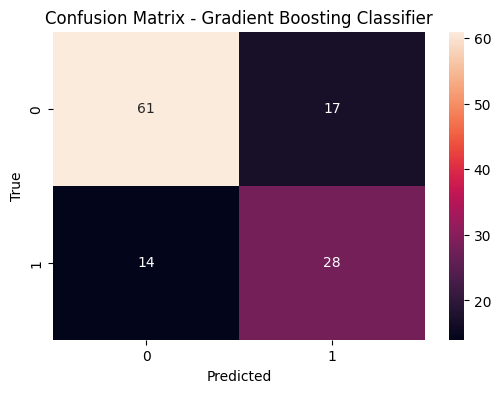


Model: Gaussian Naive Bayes
-----------------------


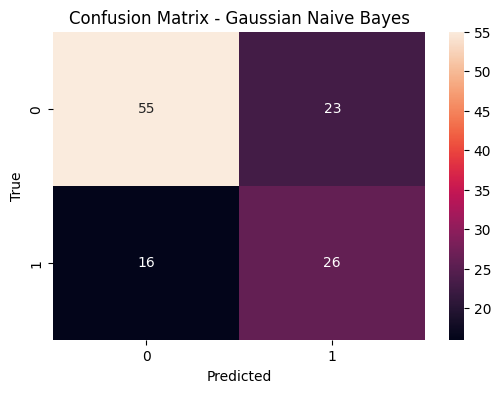


Model: Support Vector Machine
-----------------------


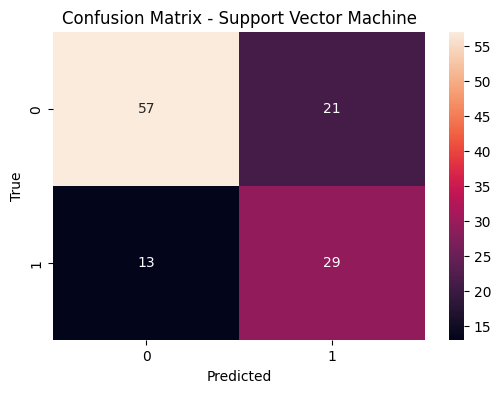

In [ ]:
for name, model in zip(models, [log_reg, rand_forest, knn, decision_tree, gb, nb, svm]):
    model.fit(X_train_scaled_df, y_train_balanced_df)
    y_pred = model.predict(X_test_scaled_df)

    print('\nModel:', name)
    print('-----------------------')
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
#sort results by f1 score
results_row = {
        'Model': name,
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1': round(f1, 2)
    }

Results = pd.concat([Results, pd.DataFrame([results_row])], ignore_index=True)

print("\F1 score Sorted (descending order)")
Results_sorted = Results.sort_values(by='F1', ascending=False).reset_index(drop=True)

Results_sorted.rename(columns={'F1': 'F1-Score'}, inplace=True)

Results_sorted

\F1 score Sorted (descending order)


,Model,Accuracy,Precision,Recall,F1-Score
0,Support Vector Machine,0.72,0.58,0.69,0.63


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
gb.fit(X_train_scaled_df, y_train_balanced_df)


GradientBoostingClassifier()

**Feature Importance**

In [ ]:
feature_importances = gb.feature_importances_

In [ ]:
total_importance = feature_importances.sum()

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X_train_scaled_df.columns, 'Importance': feature_importances})
feature_importance_df['Percentage'] = ((feature_importance_df['Importance'] / total_importance) * 100).round(2)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

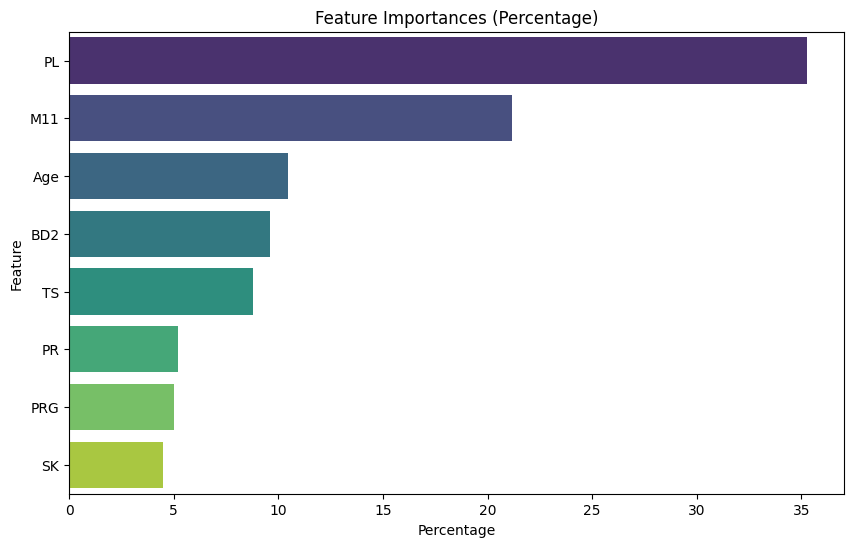

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Feature Importances (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Feature')
plt.show()

In [ ]:
print("Exact Percentage Feature Importances :")
feature_importance_df

Exact Percentage Feature Importances :


,Feature,Importance,Percentage
1,PL,0.352707,35.27
5,M11,0.211753,21.18
7,Age,0.104669,10.47
6,BD2,0.096226,9.62
4,TS,0.087809,8.78
2,PR,0.051919,5.19
0,PRG,0.050048,5.00
3,SK,0.044868,4.49


**Hyperparameter Tuning**

In [ ]:
param_grid = {
    'n_estimators': [5, 10, 20],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [5, 6, 7],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 8]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid,
                           scoring='f1', cv=5, n_jobs=-1)

grid_search.fit(X_train_scaled_df, y_train_balanced_df)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}


In [ ]:
tuned_gb = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=0.01,
    max_depth=7,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
tuned_gb.fit(X_train_scaled, y_train_balanced)
y_test_pred = tuned_gb.predict(X_test_scaled)


In [ ]:
print("Evaluation Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Evaluation Set Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73        78
           1       0.49      0.48      0.48        42

    accuracy                           0.64       120
   macro avg       0.60      0.60      0.60       120
weighted avg       0.64      0.64      0.64       120



In [ ]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1-score:", round(f1, 2))

Accuracy: 0.64
Precision: 0.49
Recall: 0.48
F1-score: 0.48


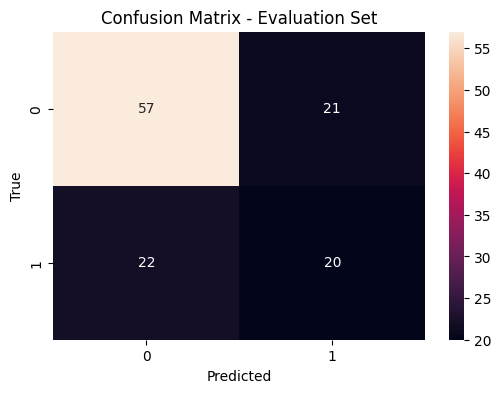

The F1-score After Model Evaluation is: 0.48


In [ ]:
cm_eval = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_eval, annot=True)
plt.title('Confusion Matrix - Evaluation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("The F1-score After Model Evaluation is:", round(f1, 2))

# **Saving File**

In [ ]:
saved_components = {
    'model': tuned_gb,
    'encoder': le,
    'scaler': scaler
}

with open('model_and_key_components.pkl', 'wb') as file:
    pickle.dump(saved_components, file)

In [ ]:
df_test.head()


,PRG,PL,PR,SK,TS,M11,BD2,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
test_pred = df_test.copy()
test_pred.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
with open('model_and_key_components.pkl', 'rb') as file:
    loaded_components = pickle.load(file)

loaded_model = loaded_components['model']
loaded_encoder = loaded_components['encoder']
loaded_scaler = loaded_components['scaler']


numerical_cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
test_data_scaled = loaded_scaler.transform(test_pred[numerical_cols])

test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=numerical_cols)

y_pred = loaded_model.predict(test_data_scaled_df)

test_predictions = test_pred.copy()
test_predictions['Sepsis'] = y_pred

sepsis_mapping = {0: 'Negative', 1: 'Positive'}

test_predictions['Sepsis'] = test_predictions['Sepsis'].map(sepsis_mapping)

test_predictions.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,6,148,72,35,0,33.6,0.627,50,Positive
1,1,85,66,29,0,26.6,0.351,31,Negative
2,8,183,64,0,0,23.3,0.672,32,Positive
3,1,89,66,23,94,28.1,0.167,21,Negative
4,0,137,40,35,168,43.1,2.288,33,Positive


In [ ]:
test_predictions.to_csv("/content/Test_Predictions.csv", index=False)#save predictions as csv

# **FAST API**

In [ ]:
%pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.3 MB/s eta 0:00:00


In [ ]:
%pip install uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import pickle
import pandas as pd


In [ ]:
#initialize app instance
app = FastAPI(
    title="Sepsis Prediction API",
    description="This FastAPI application provides sepsis predictions using a machine learning model.",
    version="1.0"
)

In [ ]:
#load the model
with open('model_and_key_components.pkl', 'rb') as file:
    loaded_components = pickle.load(file)


In [ ]:
loaded_model = loaded_components['model']
loaded_encoder = loaded_components['encoder']
loaded_scaler = loaded_components['scaler']

In [ ]:
class InputData(BaseModel):
    PRG: int
    PL: float
    PR: float
    SK: float
    TS: int
    M11: float
    BD2: float
    Age: int


In [ ]:
class OutputData(BaseModel):
    Sepsis: str

def preprocess_input_data(input_data: InputData):
    numerical_cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
    input_data_scaled = loaded_scaler.transform([list(input_data.dict().values())])
    return pd.DataFrame(input_data_scaled, columns=numerical_cols)


def make_predictions(input_data_scaled_df: pd.DataFrame):
    y_pred = loaded_model.predict(input_data_scaled_df)
    sepsis_mapping = {0: 'Negative', 1: 'Positive'}
    return sepsis_mapping[y_pred[0]]

**Endpoints**

In [ ]:
@app.get("/")
async def root():
    message = "Welcome to your Sepsis Classification API! Click [here](/docs) to access the API documentation."
    return {"message": message}


In [ ]:
@app.post("/predict/", response_model=OutputData)
async def predict_sepsis(input_data: InputData):
    try:
        input_data_scaled_df = preprocess_input_data(input_data)
        sepsis_status = make_predictions(input_data_scaled_df)
        return {"Sepsis": sepsis_status}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

**Run on localhost**

In [ ]:
if __name__ == "__main__":
    uvicorn.run("main:app", host='localhost', port=8000, reload=True)

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://localhost:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [161] using StatReload
